# pandas의 그래프 구조
- `Series_data.plot([kind='graph_kind'][,option])`
- `DataFrame_data.plot([x=label 혹은 position, y=label 혹은 position,][kind='graph_kind'][,option])`
- pandas 그래프 종류
    - line(선 그래프), scatter(산점도), bar(수직 바), barh(수평 바), hist(히스토그램), pie(파이 그래프)

## pandas의 선 그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

s1 = pd.Series(np.arange(1, 11, 1))
s1

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int32

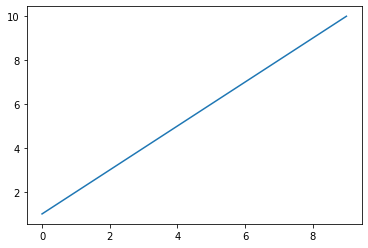

In [2]:
s1.plot()
plt.show()

In [3]:
# index가 x축, values가 y축
s2 = pd.Series(np.arange(1, 11, 1), index=pd.date_range('2021-01-01', periods=10))
s2

2021-01-01     1
2021-01-02     2
2021-01-03     3
2021-01-04     4
2021-01-05     5
2021-01-06     6
2021-01-07     7
2021-01-08     8
2021-01-09     9
2021-01-10    10
Freq: D, dtype: int32

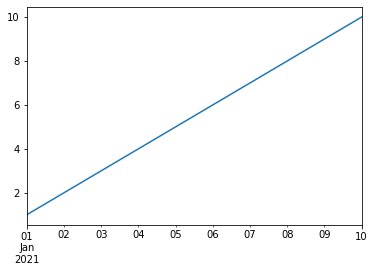

In [4]:
s2.plot()
plt.show()

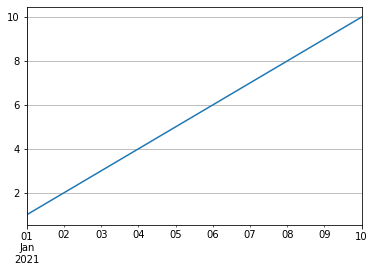

In [5]:
# 격자 추가
s2.plot(grid=True)
plt.show()

In [6]:
data = {'동해':[17.4629, 17.4116, 17.5944, 18.1495, 17.8288],
        '남해':[17.2288, 17.4092, 18.0110, 18.3175, 18.1766],
        '서해':[14.4360, 14.8248, 15.2512, 14.8979, 15.0504],
        '전체':[15.9067, 16.1526, 16.6044, 16.6284, 16.6178]}
index = pd.Index(data=[1996, 1997, 1998, 1999, 2000], name='연도')

df_rain = pd.DataFrame(data, index=index)
df_rain

,동해,남해,서해,전체
연도,,,,
1996,17.4629,17.2288,14.4360,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.0110,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.8288,18.1766,15.0504,16.6178


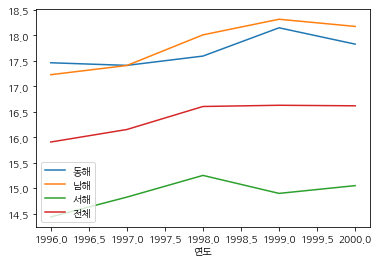

In [7]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

df_rain.plot()
plt.show()

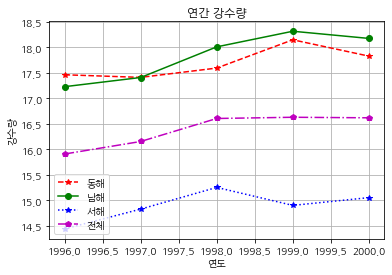

In [8]:
# 데이터마다 색, 모양, 마커 지정
# x축 라벨, y축 라벨, 제목 추가
rain_plot = df_rain.plot(grid=True, style=['r--*', 'g-o', 'b:*', 'm-.p'])
rain_plot.set_xlabel('연도')
rain_plot.set_ylabel('강수량')
rain_plot.set_title('연간 강수량')
plt.show()

In [9]:
# 연도별 1인당 주거면적 데이터
year = [2006, 2008, 2010, 2012, 2014, 2016]
area = [26.2, 27.8, 28.5, 31.7, 33.5, 33.2]
table = {'연도':year, '주거면적':area}
df_area = pd.DataFrame(table)
df_area

,연도,주거면적
0,2006,26.2
1,2008,27.8
2,2010,28.5
3,2012,31.7
4,2014,33.5
5,2016,33.2


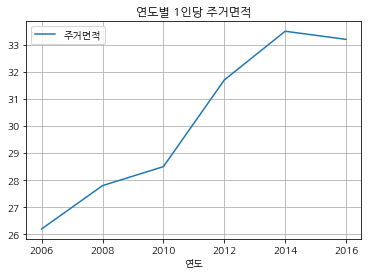

In [11]:
df_area.plot(x='연도', y='주거면적', grid=True, title='연도별 1인당 주거면적')
plt.show()

## pandas의 산점도

In [12]:
temperature = [25.2, 27.4, 22.9, 26.2, 29.5, 33.1, 30.4, 36.1, 34.4, 29.1]
Ice_cream_sales = [236500, 357500, 203500, 365200, 446600, 574200, 453200, 675400, 598400, 463100]
dict_data = {'기온':temperature, '아이스크림 판매량':Ice_cream_sales}
df_ice_cream = pd.DataFrame(dict_data)

df_ice_cream

,기온,아이스크림 판매량
0,25.2,236500
1,27.4,357500
2,22.9,203500
3,26.2,365200
4,29.5,446600
5,33.1,574200
6,30.4,453200
7,36.1,675400
8,34.4,598400
9,29.1,463100


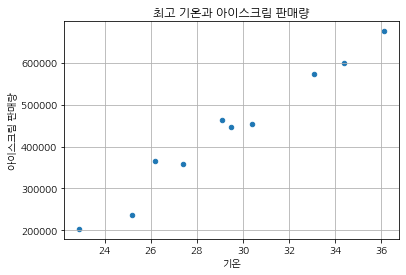

In [13]:
df_ice_cream.plot.scatter(x='기온', y='아이스크림 판매량', grid=True, title='최고 기온과 아이스크림 판매량') # 또는 df_ice_cream.plot(kind='scatter')
plt.show()

## pandas의 막대 그래프

In [14]:
grade_num = [5, 14, 12, 3]
students = ['A', 'B', 'C', 'D']

df_grade = pd.DataFrame(grade_num, index=students, columns=['Student'])
df_grade

,Student
A,5
B,14
C,12
D,3


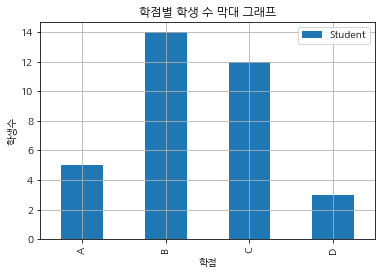

In [15]:
grade_bar = df_grade.plot.bar(grid=True) # 또는 df_grade.plot(kind='bar')
grade_bar.set_xlabel('학점')
grade_bar.set_ylabel('학생수')
grade_bar.set_title('학점별 학생 수 막대 그래프')
plt.show()

## pandas의 히스토그램

In [16]:
import random

math = [random.randint(60, 101) for _ in range(25)]
math

[92,
 99,
 70,
 93,
 90,
 67,
 75,
 75,
 88,
 92,
 100,
 94,
 92,
 64,
 89,
 85,
 83,
 80,
 98,
 95,
 96,
 67,
 81,
 89,
 69]

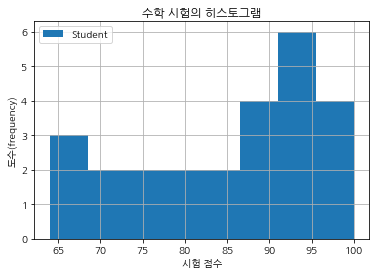

In [18]:
df_math = pd.DataFrame(math, columns=['Student'])

math_hist = df_math.plot.hist(bins=8, grid=True)
math_hist.set_xlabel('시험 점수')
math_hist.set_ylabel('도수(frequency)')
math_hist.set_title('수학 시험의 히스토그램')

plt.show()

## pandas의 파이 그래프

In [19]:
fruit = ['사과', '바나나', '딸기', '오렌지', '포도']
result = [7, 6, 3, 2, 2]

df_fruit = pd.Series(result, index=fruit, name='선택한 학생수')
df_fruit

사과     7
바나나    6
딸기     3
오렌지    2
포도     2
Name: 선택한 학생수, dtype: int64

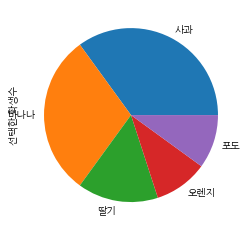

In [20]:
df_fruit.plot.pie()
plt.show()

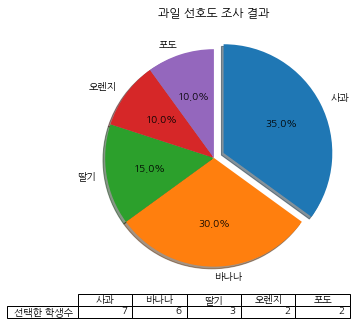

In [22]:
explode_value = (0.1, 0, 0, 0, 0)
fruit_pie = df_fruit.plot.pie(figsize=(5, 5), autopct='%.1f%%', startangle=90,
                              counterclock=False, explode=explode_value, shadow=True, table=True)
fruit_pie.set_ylabel("") # 불필요한 y축 라벨 제거
fruit_pie.set_title("과일 선호도 조사 결과")
plt.show()